# Task-2

In [39]:
%matplotlib inline

# Import Required Libraries

In [40]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Details of the Dataset

In [41]:
df = pd.read_csv("d:\Murtaza\Elevvo internship\Tasks\Task 2\Titanic-Dataset.csv")
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [44]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [45]:
from ydata_profiling import ProfileReport

report = ProfileReport(df, explorative=True)

# Save report to HTML
report.to_file("titanic_profile_report.html")

# OR display inside a Jupyter Notebook
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:00<00:00, 62.16it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Cleaning

In [46]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [47]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [48]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [49]:
df[df['Age'].isna()]

PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

        Sex  Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
5      male  NaN      0      0      330877   8.4583   NaN        Q  
17     male  NaN      0      0      244373  13.0000   NaN        S  
19   female  NaN      0      0        2649   7.2250   NaN        C  
26     male  NaN      0      0        2631   7.2250   NaN        C  
28   female  NaN      0      0      330959   7.8792   NaN        Q  
..      ...  ...    ...    ...         ...      ...   ...      ...  
859    male  NaN      0      0        2629   7.2292   NaN        C  
863  female  NaN      8      2    CA. 2343  69.5500   NaN        S  
868    male  NaN      0      0      345777   9.5000   NaN        S  
878    male  NaN      0      0      349217   7.8958   NaN        S  
888  female  NaN      1      2  W./C. 6607  23.4500   NaN        S  

[177 rows x 12 columns]

In [50]:
for col in df.columns:
    if df[col].dtype.kind in "bifc":  # numeric
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode().iloc[0])

In [51]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [52]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Group-Based Insights from the data

In [53]:
# Survival by Sex
print("Survival by Sex:\n", df.groupby("Sex")["Survived"].mean())


Survival by Sex:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [54]:
# Survival by Class
print("\nSurvival by Pclass:\n", df.groupby("Pclass")["Survived"].mean())


Survival by Pclass:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [55]:
# Survival by Embarked
print("\nSurvival by Embarked:\n", df.groupby("Embarked")["Survived"].mean())


Survival by Embarked:
 Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


# Data Visualization

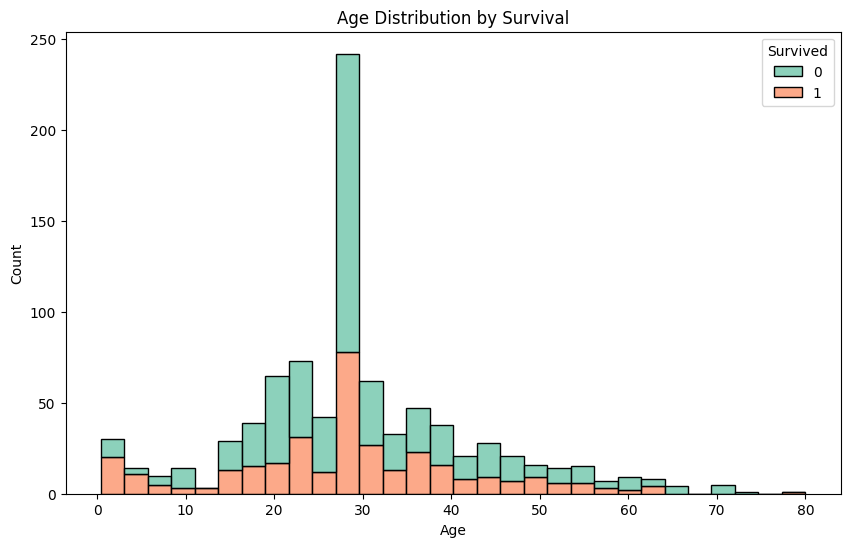

In [56]:
# Survival by Age Distribution
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Age", hue="Survived", multiple="stack", bins=30, palette="Set2")
plt.title("Age Distribution by Survival")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_14380\3487377129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Fare", data=df, palette="Set3")


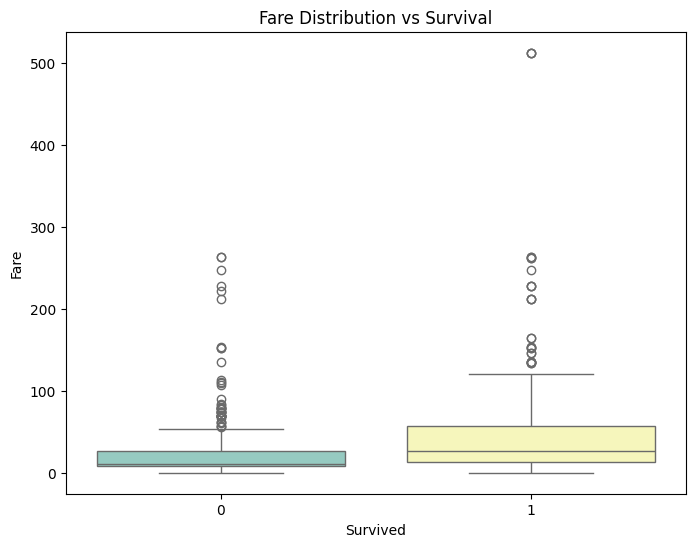

In [57]:
# Fare Distribution by Survival
plt.figure(figsize=(8,6))
sns.boxplot(x="Survived", y="Fare", data=df, palette="Set3")
plt.title("Fare Distribution vs Survival")
plt.show()

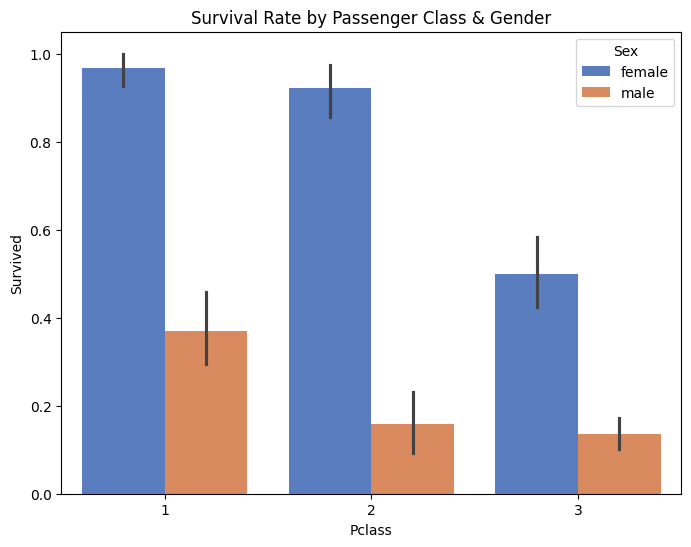

In [58]:
# Survival Rate by Gender & Class 
plt.figure(figsize=(8,6))
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df, palette="muted")
plt.title("Survival Rate by Passenger Class & Gender")
plt.show()

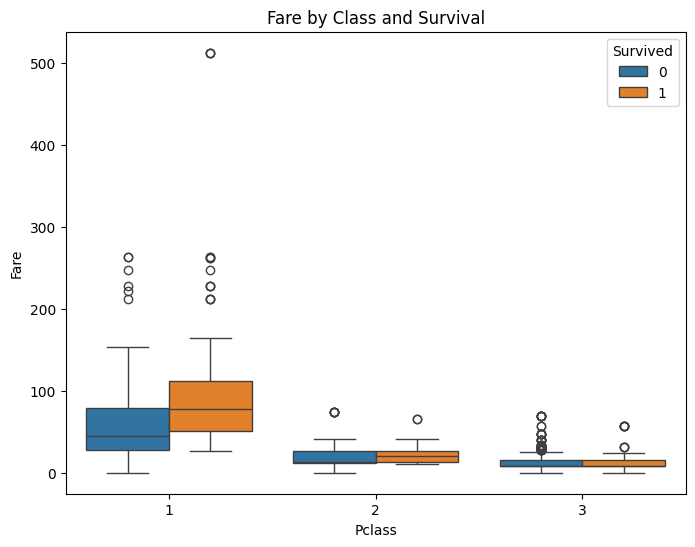

In [59]:
# Boxplot: Fare vs Pclass (richness effect)
plt.figure(figsize=(8,6))
sns.boxplot(x="Pclass", y="Fare", hue="Survived", data=df)
plt.title("Fare by Class and Survival")
plt.show()

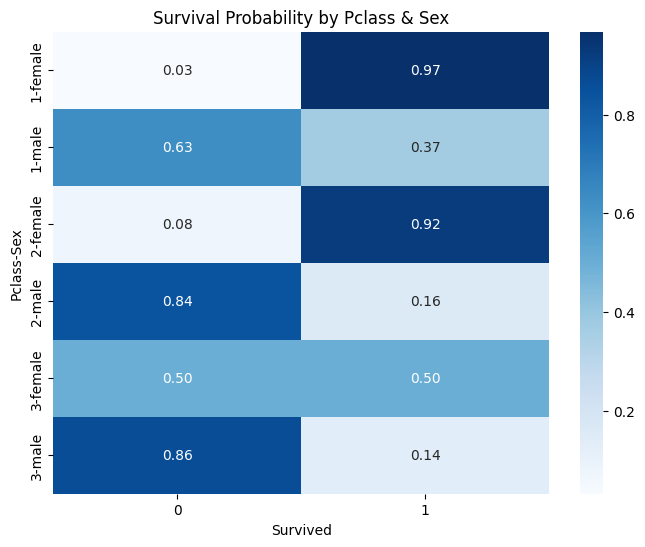

In [60]:
# Crosstab Heatmap: Pclass vs Sex vs Survival
ct = pd.crosstab([df["Pclass"], df["Sex"]], df["Survived"], normalize="index") 
plt.figure(figsize=(8,6))
sns.heatmap(ct, annot=True, cmap="Blues", fmt=".2f")
plt.title("Survival Probability by Pclass & Sex")
plt.show()

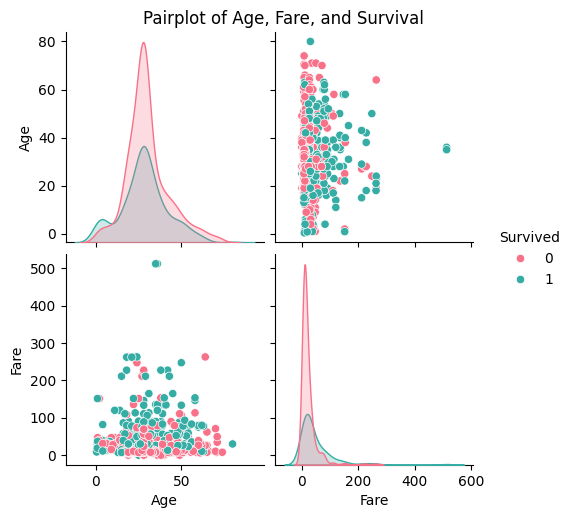

In [61]:
# Pairplot: Age, Fare, Survival
sns.pairplot(df[["Age", "Fare", "Survived"]], hue="Survived", palette="husl")
plt.suptitle("Pairplot of Age, Fare, and Survival", y=1.02)
plt.show()

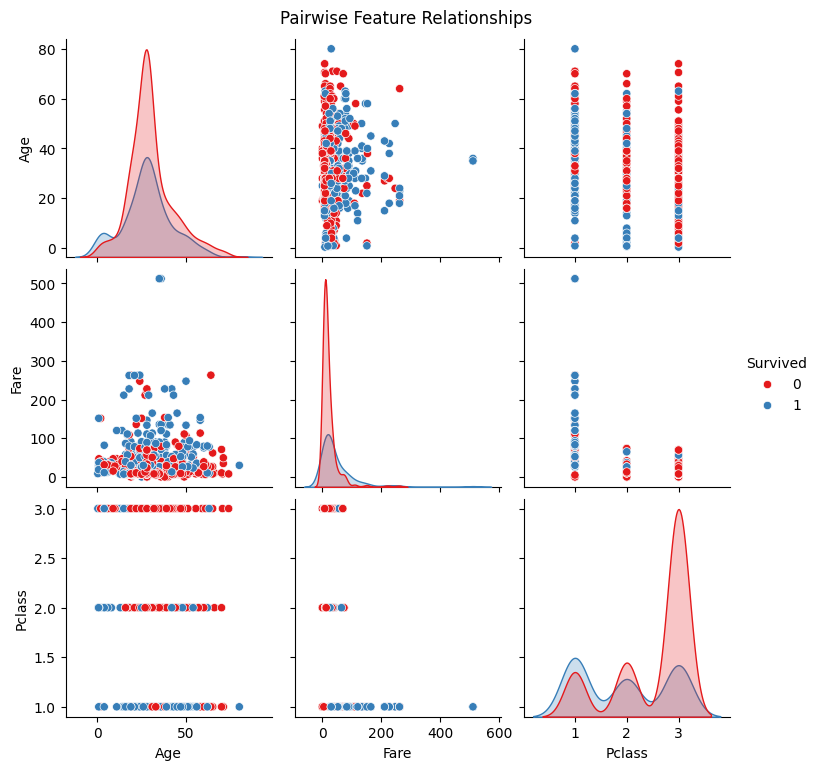

In [62]:
# Pairplot: Key Features vs Survival
sns.pairplot(df[["Survived", "Age", "Fare", "Pclass"]], hue="Survived", diag_kind="kde", palette="Set1")
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

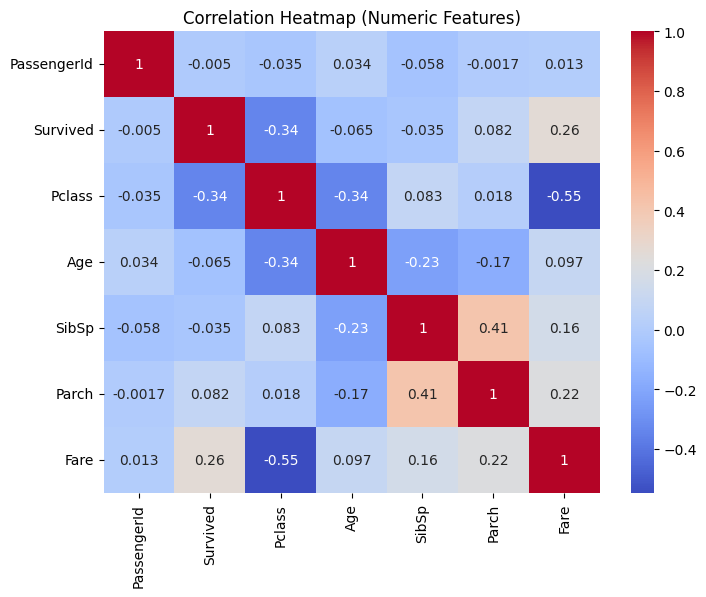

In [63]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

# Bonus

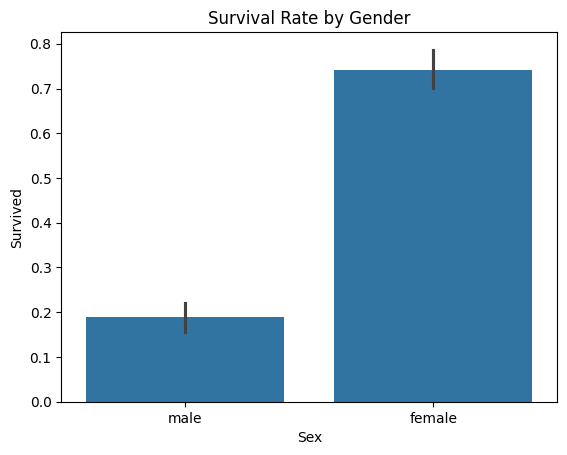

In [64]:
# Survival Rate by Gender
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Gender")
plt.show()

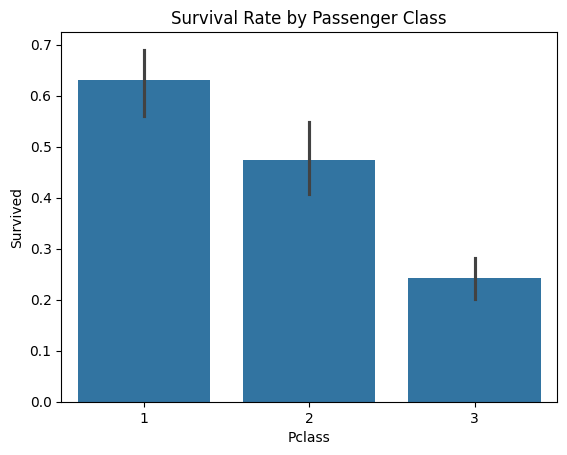

In [65]:
# Survival Rate by Passenger Class
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

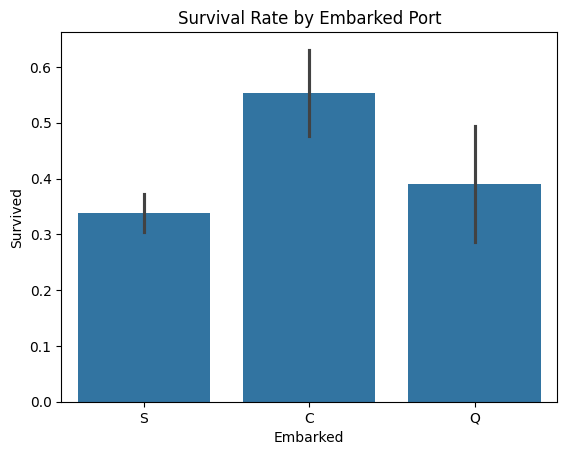

In [66]:
# Survival Rate by Embarked Port
sns.barplot(x="Embarked", y="Survived", data=df)
plt.title("Survival Rate by Embarked Port")
plt.show()

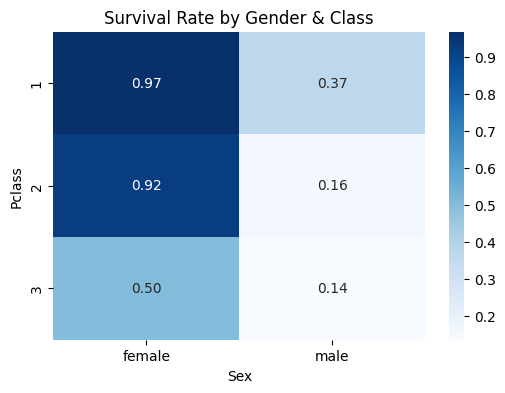

In [67]:
# Heatmap: Survival by Gender & Class
visual = pd.crosstab(df["Pclass"], df["Sex"], values=df["Survived"], aggfunc="mean")
plt.figure(figsize=(6,4))
sns.heatmap(visual, annot=True, cmap="Blues", fmt=".2f")
plt.title("Survival Rate by Gender & Class")
plt.show()

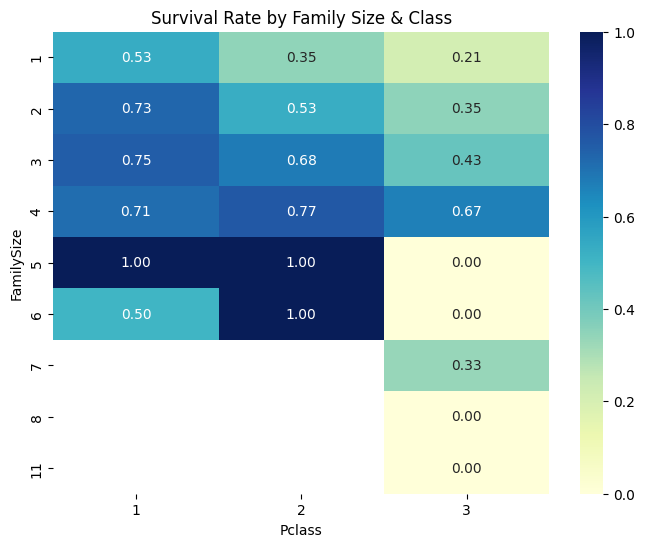

In [68]:
# Heatmap: Survival by Family Size vs Class
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
visual2 = pd.crosstab(df["FamilySize"], df["Pclass"], values=df["Survived"], aggfunc="mean")
plt.figure(figsize=(8,6))
sns.heatmap(visual2, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Survival Rate by Family Size & Class")
plt.show()